In [ ]:
# 박홍준 과장님 소스

library(ggplot2)

setwd("C:\\Users\\6009414\\Desktop\\down")
file_list <- list.files()

result <- NULL

for(i in 1:length(file_list)){
  data <- read.table(file_list[i],header = TRUE,sep = "\t",stringsAsFactors = F)
  data2_1 <- data[,c(14,15,16)]
  colnames(data2_1) <- c("current", "voltage", "time")
  data2_1$layer <- unlist(strsplit(file_list[i], "_"))[1]
  data2_1$fault <- unlist(strsplit(file_list[i], "_"))[2]
  result <- rbind(result, data2_1)
}

write.csv(result, "total_data.csv", row.names = F)

# LAYER별 SCATTER PLOT
layer_list <- unique(result$layer)
for(i in 1:length(layer_list)){
  tmp <- subset(result, layer == layer_list[i])
  ggplot(tmp, aes(x = voltage, y = current, color = fault)) +
    geom_point(aes(size = 2))
}

In [1]:
install.packages('cluster')
library(cluster)

package 'cluster' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2801123\AppData\Local\Temp\Rtmpy4K5GS\downloaded_packages


In [2]:
df_TC_LH_205_1 <- read.csv('D:/kimchaek file/csv_file/df_TC_LH_205_1.csv',sep = '\t')
df_TC_LH_205_2 <- read.csv('D:/kimchaek file/csv_file/df_TC_LH_205_2.csv',sep = '\t')
df_TC_LH_205_3 <- read.csv('D:/kimchaek file/csv_file/df_TC_LH_205_3.csv',sep = '\t')
df_TC_LH_208_2 <- read.csv('D:/kimchaek file/csv_file/df_TC_LH_208_2.csv',sep = '\t')
df_TC_LH_208_3 <- read.csv('D:/kimchaek file/csv_file/df_TC_LH_208_3.csv',sep = '\t')
df_TC_LH_210_1 <- read.csv('D:/kimchaek file/csv_file/df_TC_LH_210_1.csv',sep = '\t')
df_TC_LH_210_2 <- read.csv('D:/kimchaek file/csv_file/df_TC_LH_210_2.csv',sep = '\t')
df_TC_LH_211_2 <- read.csv('D:/kimchaek file/csv_file/df_TC_LH_211_2.csv',sep = '\t')

In [3]:
names(df_TC_LH_205_1)
head(df_TC_LH_205_1)

[1] "weld_time"  "current"    "voltage"    "weld_point" "robot_name"
[6] "layer"

weld_time current voltage weld_point robot_name  layer
1 219       7430    2084    1          TC_LH_205_1 2    
2 204       7437    2034    2          TC_LH_205_1 2    
3 252       7669    2173    3          TC_LH_205_1 2    
4 340       8019    1988    4          TC_LH_205_1 2    
5 340       7745    2302    5          TC_LH_205_1 3    
6 340       7839    2221    6          TC_LH_205_1 3

In [4]:
df_TC_LH_205_11 <- df_TC_LH_205_1[c(1:4)]
df_TC_LH_205_11

weld_time current voltage weld_point
1      219       7430    2084     1        
2      204       7437    2034     2        
3      252       7669    2173     3        
4      340       8019    1988     4        
5      340       7745    2302     5        
6      340       7839    2221     6        
7      234       7624    2100     7        
8      252       7685    2153     8        
9      234       7615    2146     9        
10     234       7610    2142    10        
11     252       7646    2145    11        
12     243       7633    2264    12        
13     328       7478    2538    13        
14     560       9038    3004    14        
15     549       8317    2964    15        
16     384       8026    2756    16        
17     384       8077    2657    17        
18     371       7947    2686    18        
19     384       8064    2666    19        
20     384       7986    2626    20        
21     339       7372    2689    21        
22     324       7434    2708    22        
23     234       7621    2227    23        
24     252       7638    2303    24        
25     237       7643    2306    25        
26     234       7607    2251    26        
27     252       7673    2281    27        
28     252       7670    2268    28        
29     340       8258    2269    29        
30     335       8272    2273    30        
...    ...       ...     ...     ...       
137659 371       6297    1933    17        
137660 371       6299    1936    18        
137661 441       6506    2163    19        
137662 441       6425    2236    20        
137663 441       6706    2088    21        
137664 287       8134    2106    22        
137665 287       8152    2210    23        
137666 379       6316    1834     1        
137667 373       6302    1875     2        
137668 372       6310    1918     3        
137669 371       6306    1942     4        
137670 371       6314    1958     5        
137671 372       6300    1946     6        
137672 408       6448    1974     7        
137673 386       6209    2108     8        
137674 386       6286    2345     9        
137675 409       6493    2209    10        
137676 274       8304    2273    11        
137677 274       8322    2201    12        
137678 254       8189    2214    13        
137679 254       8198    2132    14        
137680 371       6296    2285    15        
137681 375       6311    1906    16        
137682 371       6295    1955    17        
137683 371       6300    1964    18        
137684 441       6472    2171    19        
137685 441       6456    2261    20        
137686 458       6928    2072    21        
137687 287       8210    2221    22        
137688 287       8201    2226    23

In [5]:
a = nrow(df_TC_LH_205_11)
a

[1] 137688

In [8]:
cor(df_TC_LH_205_11,method = 'pearson')

weld_time   current    voltage   weld_point
weld_time   1.00000000 -0.1467337 0.3954716 0.01052443
current    -0.14673371  1.0000000 0.5483781 0.32131217
voltage     0.39547161  0.5483781 1.0000000 0.39836356
weld_point  0.01052443  0.3213122 0.3983636 1.00000000

weld_time   current    voltage   weld_point
weld_time   1.00000000 -0.1467337 0.3954716 0.01052443
current    -0.14673371  1.0000000 0.5483781 0.32131217
voltage     0.39547161  0.5483781 1.0000000 0.39836356
weld_point  0.01052443  0.3213122 0.3983636 1.00000000

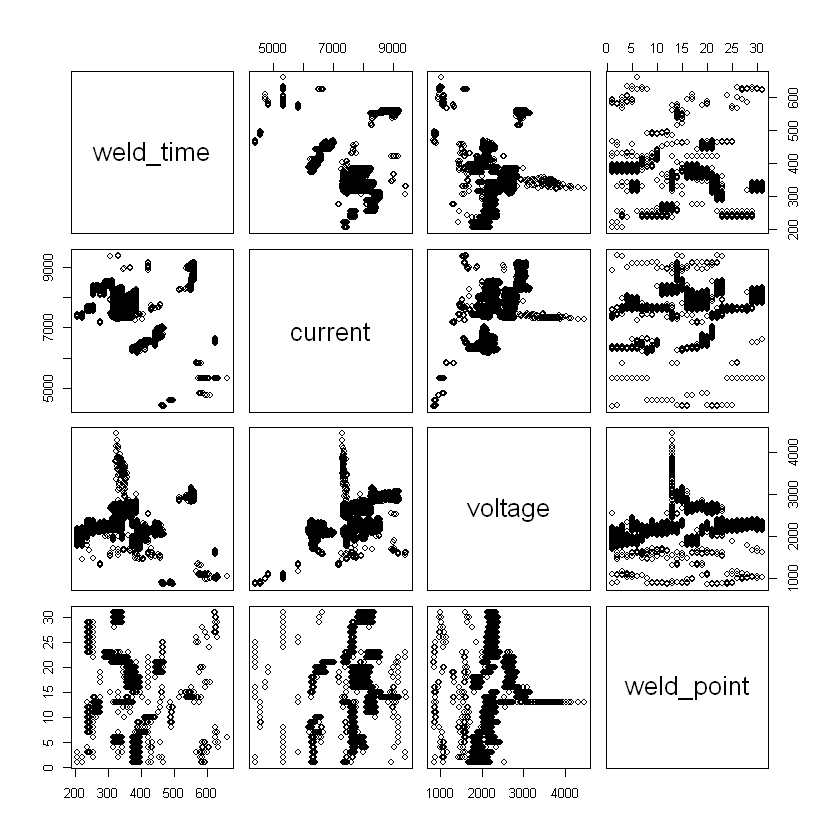

In [10]:
cor(df_TC_LH_205_11,method = 'pearson')
plot(df_TC_LH_205_11)

In [6]:
idist <- dist(df_TC_LH_205_11)
idist

ERROR: Error: 크기가 70.6 Gb인 벡터를 할당할 수 없습니다


In [13]:
head(idist)

[1]  3.464102 11.445523  2.449490 15.524175  3.741657 14.142136

In [26]:
hc <- hclust(idist)
hc


Call:
hclust(d = idist)

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 89 


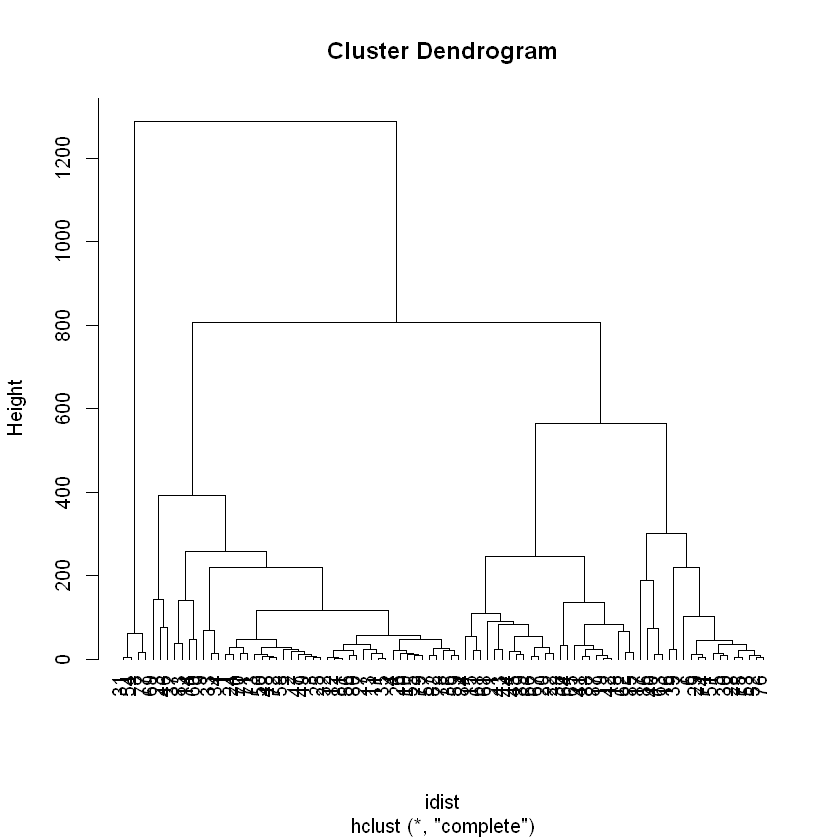

In [27]:
plot(hc,hang=-1)

In [28]:
rect.hclust(hc, k=3, border = 'red')

ERROR: Error in rect(m[which[n]] + 0.66, par("usr")[3L], m[which[n] + 1] + 0.33, : plot.new has not been called yet


In [19]:
idist <- dist(iris[1:4])
idist

            1         2         3         4         5         6         7
2   0.5385165                                                            
3   0.5099020 0.3000000                                                  
4   0.6480741 0.3316625 0.2449490                                        
5   0.1414214 0.6082763 0.5099020 0.6480741                              
6   0.6164414 1.0908712 1.0862780 1.1661904 0.6164414                    
7   0.5196152 0.5099020 0.2645751 0.3316625 0.4582576 0.9949874          
8   0.1732051 0.4242641 0.4123106 0.5000000 0.2236068 0.7000000 0.4242641
9   0.9219544 0.5099020 0.4358899 0.3000000 0.9219544 1.4594520 0.5477226
10  0.4690416 0.1732051 0.3162278 0.3162278 0.5291503 1.0099505 0.4795832
11  0.3741657 0.8660254 0.8831761 1.0000000 0.4242641 0.3464102 0.8660254
12  0.3741657 0.4582576 0.3741657 0.3741657 0.3464102 0.8124038 0.3000000
13  0.5916080 0.1414214 0.2645751 0.2645751 0.6403124 1.1618950 0.4898979
14  0.9949874 0.6782330 0.5000000 0.51

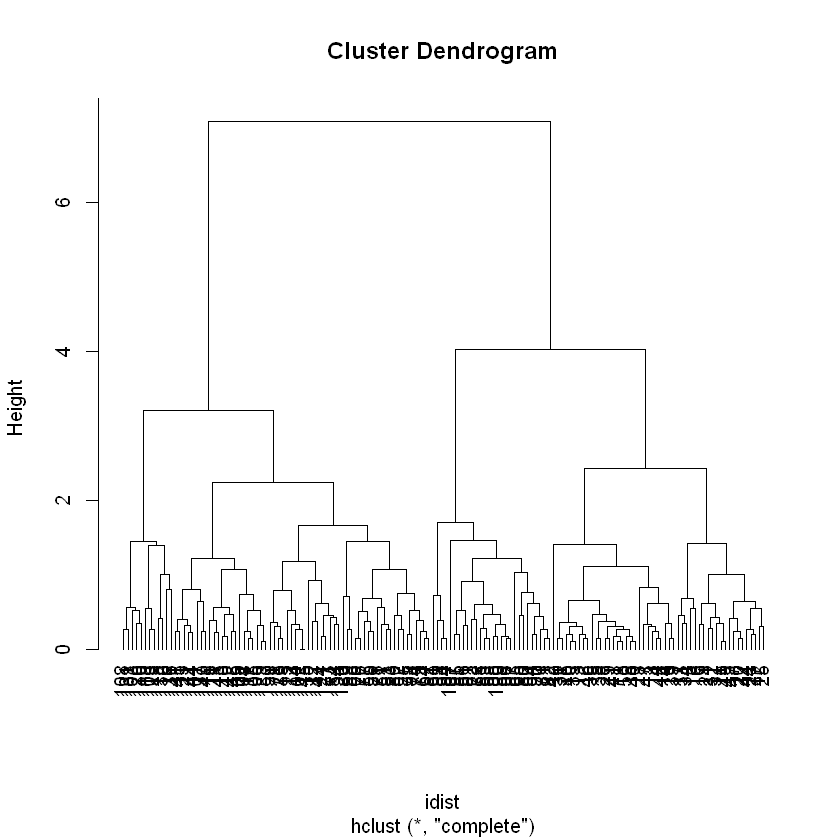

In [20]:
hc <- hclust(idist)
plot(hc,hang = -1)

In [23]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [25]:
t <- sample(1:nrow(diamonds),1000)
t

[1]  4208 50271 37689 22573 35304 40788 34570  2906  3428  4426  6110 53187
  [13] 52164  8515 26136 15087 44663 37327 42640 12776 23475 38398 37784  3548
  [25]   837 15708 44406 30567 24475 10076  6051  9740 47594 10185 32241 14190
  [37] 27396 38427 14986 27483 12964 31757 14911 37512 28321 45766  8165 35517
  [49] 30920 35968  5016 29292  4412 41000  8951 29491 14316 15365 41780 38249
  [61] 12761 29365 21861  7874  9585 46852  2145 51446  7108 47366  8223 19567
  [73] 51121 18253  2038 12925 38501    85 15989 19792 23103 47109  2737  6452
  [85]  2226 15801 40727 19170 25477 26960 46040 16297 13759 11940  9075 45280
  [97]  5109  9060 25481 18657 17216 52363 36730 18771 26022 39004  4120 39293
 [109] 21595 45353   687 32711 26496 36933 12560 40449  2757 13197 33249  3628
 [121] 41171 52491   158 21441 40668 12402   718 22662 45033 42193 44865 36994
 [133] 47232  8662 32404 39422 31785  8821 37647  4213 19337 42372  9754 33740
 [145] 31988 47760 38739 11674 46770 29548 21366 49693   748 11846 27306 25499
 [157] 18767 32153 14104  4625 20419 24608 49981 13562 38395 44925 37592 10627
 [169] 26120 11690 31306 31709 24217 53412 14572 15494 29876 27101 17628 17007
 [181]  3638 29966 45501 32093 23020 52869 20304 19614  9633   754 24216 43045
 [193] 41314   971 26838 42822 50682 48632 38013 50016 42338 35269 53158 38147
 [205] 29342  5539 29115 39611 39679 35519 16143 16793 30356 37274 21822 39809
 [217] 49100 42286 37135  4260 34991 42438  4850 52123  2304 49312 40477 28349
 [229] 25051 28935 37976 51283 32941 30728  6823  5056 17414 38680 34807 28203
 [241] 38527 23390 36170 33120 23502  4045 41443 11032 49549 46643 42663 41909
 [253] 45980 24758 25790 31258 33469 43118 22939  9548 48324 23700   841  2601
 [265] 32838  4500  9206 35206  8215 33545  4741 47863 45604 15076 49745   840
 [277] 33968 17236 10148 26686 19501 33685   544 20963 27582 46990 43827 20376
 [289] 40548 33424  1123 33628  1912 32577 40369  1358 23147 51650 27113 27274
 [301] 14355 29641 12810 31216 40204 31906 23142 53129 39056 25439  2950 37851
 [313] 16581 47332   567  5145  2540  5660 49884  8103  5424   512  4139 44451
 [325] 16131 15843 51264 14227 18458 15020 47755 45747 51639  6302  1081 17890
 [337] 52381  8032 26969 27919 15766  7669 37624 12586 36355 45673 42731  2471
 [349] 39926 45430 37017 22895 53849 15476  3274 24048   569 29567  5690 40975
 [361] 13044 33602 32235 36957 25943 47406 44332 38451 11415 32959 26703 44285
 [373] 52416 51240 29356 14995 26006  5533 33136  5865 33871 20080 33192  8792
 [385]  9757  6003 22808  4320 14435 13195  8923 20897 45434 18016 50040 27609
 [397]  1312  8146 12387 52151 31312 17152 32555 53477  1600 48556 26037  8493
 [409] 43831 21408  8064 22778 30352 47418 22806 48655   858 22427  1716 27593
 [421] 29633 44129  3072 43807 17044 52939 15947 23340 51321 32739 15488  7170
 [433] 25843 32603 39860 34217  2437 36662 30411 39654 39907 48349  4056 40405
 [445] 28262 42453 49920  7001 22562 12216 24242 11025 50809 47165 33208 48799
 [457] 32628 29828 20282  7242 53267 23161  7492 16667 22875 39228 38546 45236
 [469]   525 32013 37758 35624  5498 23637 22355 53151 14331 41715 10399 16955
 [481]  9428  7682 15676 46584  8090 11422 44333  1465 39457 31937 20040 44359
 [493] 13338 16452 24283  8789   710 20368   575 13346 21627 40261 46696 12194
 [505] 35702 43400 39537 52002 40387  1739 40782 22449 52735 23102 41805 43210
 [517] 46471 37237 47522  6351 39961 44238 50654 32682 21062 15130 15327  7174
 [529] 34078 21316 33037 50008  3308 31704 22246 10423  7565 22215 28336  3169
 [541] 34704 17006  5516 43144 34500  2615 18371 29761 20192  9980 18170 41396
 [553] 23904 17333  6906 39877 22820 47177 42930 34112  4008 38296 43884 11117
 [565] 42285 37385 36732 31530  9083 39859 22690 32418  6664  2993 47477 32806
 [577]  2185 24558  2595 25847 41775 40493 21592 47288 42895 43485 13700 22087
 [589] 49347 31277 33003 37564 41778  5577 45452 48567 15736   659 37890 45109
 [601] 25871 12463 51949 10676 27085 19982 42558  886

In [27]:
test <- diamonds[t,]
test

carat cut       color clarity depth table price x    y    z   
1    1.04  Fair      G     SI2     66.1  60.0   3564 6.32 6.23 4.15
2    0.64  Ideal     E     VS2     62.0  55.0   2238 5.52 5.55 3.43
3    0.43  Ideal     D     SI1     62.5  55.0    993 4.83 4.80 3.01
4    1.52  Fair      G     VS2     55.2  66.0  10623 7.72 7.67 4.26
5    0.30  Good      H     VS2     63.5  59.0    473 4.20 4.27 2.69
6    0.40  Ideal     F     VVS1    61.9  55.0   1168 4.75 4.78 2.95
7    0.31  Ideal     G     IF      61.0  55.0    871 4.39 4.42 2.69
8    0.80  Good      F     VS2     60.5  62.3   3283 5.97 6.01 3.62
9    0.95  Fair      D     SI2     64.4  60.0   3384 6.06 6.02 3.89
10   1.15  Ideal     G     SI2     62.8  57.0   3613 6.70 6.65 4.19
11   1.06  Ideal     E     SI2     60.7  57.0   3977 6.61 6.59 4.00
12   0.59  Very Good F     IF      59.9  63.0   2632 5.44 5.47 3.27
13   0.72  Very Good E     SI1     62.6  59.0   2474 5.66 5.71 3.56
14   1.01  Ideal     J     VS2     62.3  55.0   4425 6.40 6.44 4.00
15   1.61  Ideal     F     VS2     62.9  56.0  15426 7.52 7.46 4.71
16   1.05  Very Good D     SI1     59.3  58.0   6063 6.68 6.74 3.98
17   0.35  Ideal     D     SI2     62.4  55.0    522 4.53 4.54 2.83
18   0.49  Premium   F     SI2     60.8  60.0    980 5.12 5.04 3.09
19   0.50  Ideal     D     SI2     61.6  57.0   1332 5.13 5.10 3.15
20   1.12  Premium   G     SI1     59.8  58.0   5329 6.79 6.76 4.05
21   2.16  Premium   H     SI2     62.3  57.0  11473 8.29 8.22 5.14
22   0.39  Premium   D     VS2     61.3  58.0   1024 4.73 4.70 2.89
23   0.38  Ideal     E     VS1     61.6  56.0   1000 4.65 4.67 2.87
24   0.91  Premium   H     SI1     60.9  58.0   3414 6.26 6.22 3.80
25   0.82  Ideal     F     SI2     62.3  56.0   2867 6.02 5.96 3.73
26   0.24  Very Good E     VVS2    62.4  54.0    608 3.96 3.99 2.48
27   0.53  Ideal     D     VS2     61.4  55.0   1585 5.21 5.24 3.21
28   0.31  Ideal     D     VS2     62.1  54.0    734 4.34 4.36 2.70
29   1.51  Ideal     D     SI1     59.5  57.0  12738 7.56 7.46 4.47
30   0.29  Very Good F     VVS2    60.8  63.0    592 4.28 4.31 2.61
...  ...   ...       ...   ...     ...   ...   ...   ...  ...  ... 
971  1.22  Premium   H     VS1     62.2  58     5773 6.84 6.76 4.23
972  0.44  Ideal     E     VS1     61.5  56     1155 4.92 4.90 3.02
973  0.32  Ideal     D     SI1     61.3  55      558 4.41 4.46 2.72
974  0.56  Premium   E     SI1     62.5  59     1653 5.24 5.20 3.26
975  1.16  Ideal     D     SI1     62.0  56     5911 6.76 6.73 4.18
976  0.70  Good      I     SI1     63.6  55     1995 5.62 5.58 3.56
977  1.01  Premium   G     VS1     62.7  58     6499 6.38 6.41 4.01
978  0.72  Premium   F     VS2     62.7  59     2607 5.75 5.71 3.59
979  0.36  Premium   F     VS2     61.4  58      932 4.60 4.56 2.81
980  0.25  Ideal     G     VVS2    62.1  56      525 4.02 4.05 2.50
981  0.70  Premium   G     SI2     58.1  60     2056 5.81 5.79 3.37
982  0.30  Very Good E     VS1     63.6  54      620 4.28 4.33 2.74
983  1.04  Fair      G     SI2     65.2  57     2745 6.25 6.23 4.07
984  1.50  Good      J     SI2     63.7  58     5107 7.19 7.13 4.56
985  1.51  Very Good I     VVS1    62.0  58    11512 7.27 7.31 4.52
986  0.73  Premium   F     SI1     62.4  55     2346 5.78 5.71 3.59
987  0.24  Very Good E     VVS2    63.1  56      552 3.92 3.97 2.49
988  2.50  Fair      H     SI2     64.9  58    13278 8.46 8.43 5.48
989  1.00  Good      J     VS2     62.0  61     3835 6.36 6.45 3.97
990  0.71  Very Good I     SI1     61.8  56     2141 5.73 5.76 3.55
991  1.02  Good      G     VS1     63.3  58     6738 6.38 6.42 4.05
992  1.02  Good      E     SI2     62.8  64     3838 6.36 6.32 3.98
993  0.42  Very Good E     SI1     63.4  56      992 4.82 4.74 3.03
994  0.50  Fair      G     VS1     65.9  57     1373 5.00 4.87 3.25
995  0.76  Ideal     F     VVS2    60.9  57     3716 5.89 5.96 3.61
996  0.58  Very Good F     VS2     60.7  63     1914 5.39 5.36 3.26
997  0.33  Ideal     E     SI2     62.2  54      427 4.44 4.4

In [28]:
dim(test)

[1] 1000   10

In [29]:
mydia <- test[c('price','carat','depth','table')]
head(mydia)

price carat depth table
1  3564 1.04  66.1  60   
2  2238 0.64  62.0  55   
3   993 0.43  62.5  55   
4 10623 1.52  55.2  66   
5   473 0.30  63.5  59   
6  1168 0.40  61.9  55

In [30]:
result <- hclust(dist(mydia),method = 'ave')
result


Call:
hclust(d = dist(mydia), method = "ave")

Cluster method   : average 
Distance         : euclidean 
Number of objects: 1000 


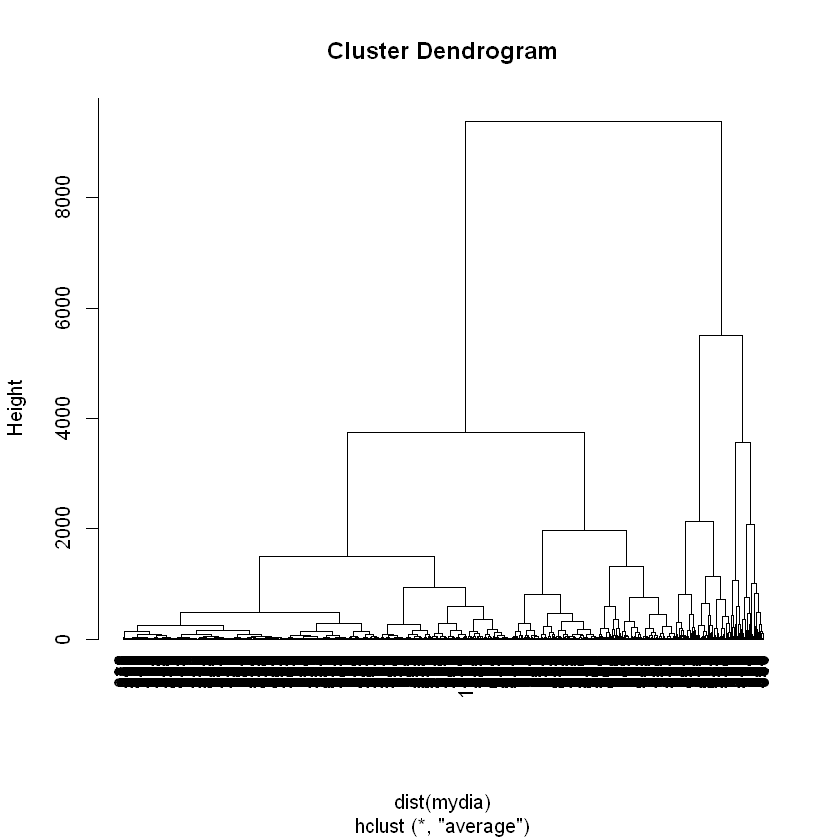

In [31]:
plot(result,hang=-1)

In [32]:
rect.hclust(result, k=5, border = 'red')

ERROR: Error in rect(m[which[n]] + 0.66, par("usr")[3L], m[which[n] + 1] + 0.33, : plot.new has not been called yet


In [33]:
result2 <- kmeans(mydia,3)

In [34]:
names(result2)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [35]:
result2$cluster
mydia$cluster <- result2$cluster
head(mydia)

[1] 3 1 1 2 1 1 1 1 1 3 3 1 1 3 2 3 1 1 1 3 2 1 1 1 1 1 1 1 2 1 1 3 1 3 1 3 2
  [38] 1 3 2 3 1 3 1 1 1 3 1 1 1 3 1 3 1 3 1 3 1 1 1 3 1 2 3 3 1 1 1 3 1 3 3 1 3
  [75] 1 3 1 1 3 3 2 1 1 3 1 3 1 3 2 2 1 3 3 3 3 1 3 1 2 3 3 1 1 3 1 1 3 1 2 1 1
 [112] 1 2 1 3 1 1 3 1 3 1 1 1 2 1 3 1 2 1 1 1 1 1 3 1 1 1 3 1 3 3 1 3 1 1 1 1 3
 [149] 1 1 1 1 1 3 2 2 3 1 3 3 3 2 1 3 1 1 1 3 2 3 1 1 2 1 3 3 1 2 3 3 3 1 1 1 1
 [186] 1 3 3 3 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 3 1 1 2 1 1 1 1 3 1 1
 [223] 3 1 1 1 1 1 2 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 2 3 1 3 1 1 1 1 1 2 2 1 1 1 2
 [260] 3 1 2 1 1 1 3 3 1 3 1 3 1 1 3 1 1 1 3 3 1 3 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1
 [297] 2 1 2 2 3 1 3 1 1 1 2 1 1 2 1 1 3 1 1 3 1 3 1 3 3 1 3 1 3 3 1 3 3 3 1 1 1
 [334] 3 1 3 1 3 2 1 3 3 1 3 1 1 1 1 1 1 1 2 1 3 1 1 1 1 3 1 1 1 1 1 2 1 1 1 3 1
 [371] 1 1 1 1 1 3 2 3 1 3 1 3 1 3 3 3 2 3 3 3 3 3 1 3 1 2 1 3 1 1 1 3 1 1 1 1 1
 [408] 3 1 2 1 2 1 1 2 1 1 2 1 2 1 1 1 1 1 1 3 2 1 1 3 3 2 1 1 1 1 1 1 1 1 1 1 1
 [445] 1 1 1 3 2 3 2 3 1 1 1 1 1 1 3 3 1 2 3 3 2 1 1 1 1 1 1 1 3 2 1 1 3 1 1 3 3
 [482] 3 3 1 3 3 1 1 1 1 1 1 3 3 2 3 1 3 1 3 2 1 1 3 1 1 1 1 1 1 1 2 1 2 1 1 1 1
 [519] 1 3 1 1 1 1 2 3 3 3 1 2 1 1 1 1 2 3 3 2 1 1 1 3 3 1 1 1 1 1 3 3 3 1 2 3 3
 [556] 1 2 1 1 1 3 1 1 3 1 1 1 1 3 1 1 1 3 1 1 1 1 2 1 2 1 1 2 1 1 1 3 2 1 1 1 1
 [593] 1 3 1 1 3 1 1 1 2 3 1 3 2 3 1 3 3 1 1 1 1 1 1 1 3 2 1 3 1 3 1 1 3 1 1 1 3
 [630] 1 1 3 1 1 3 1 3 3 3 1 1 1 1 3 3 1 1 1 3 1 1 3 1 3 1 1 3 1 1 3 1 1 1 3 2 1
 [667] 1 1 3 1 3 1 1 3 2 1 1 1 3 1 1 1 1 1 2 1 3 1 2 3 1 1 3 3 3 1 1 3 1 1 3 3 1
 [704] 1 1 3 3 3 1 1 1 1 1 1 3 1 3 1 1 1 3 1 1 2 1 3 1 3 1 3 3 3 1 1 1 1 2 1 1 3
 [741] 1 1 3 1 3 3 1 3 1 3 1 3 2 1 3 1 3 1 3 1 1 1 3 1 1 1 3 1 1 1 3 1 1 1 2 3 3
 [778] 2 2 3 2 1 1 1 1 1 2 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 3 1 3 1 1 2 3
 [815] 1 1 2 1 2 1 3 1 1 2 2 2 3 3 3 1 3 1 1 1 1 2 1 1 3 1 2 2 1 3 3 1 1 2 3 1 1
 [852] 1 2 3 1 1 3 3 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 2 3 3 1 1 1 1 2 3
 [889] 3 1 2 1 3 3 3 1 3 3 1 3 1 1 1 1 3 1 1 3 1 3 1 2 3 2 1 1 1 1 1 3 1 1 3 1 3
 [926] 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 3 2 1 1 1 2 1 1 1 1 3 1 1 2 3 1 3 1 3 1 1 1
 [963] 1 3 1 1 3 1 1 1 3 1 1 1 3 1 3 1 1 1 1 1 1 3 2 1 1 2 3 1 3 3 1 1 3 1 1 1 2
[1000] 1

price carat depth table cluster
1  3564 1.04  66.1  60    3      
2  2238 0.64  62.0  55    1      
3   993 0.43  62.5  55    1      
4 10623 1.52  55.2  66    2      
5   473 0.30  63.5  59    1      
6  1168 0.40  61.9  55    1

price       carat      depth       table     
price  1.00000000 0.91645521 -0.04296901  0.1608054
carat  0.91645521 1.00000000  0.00515034  0.2361118
depth -0.04296901 0.00515034  1.00000000 -0.2920377
table  0.16080539 0.23611177 -0.29203766  1.0000000

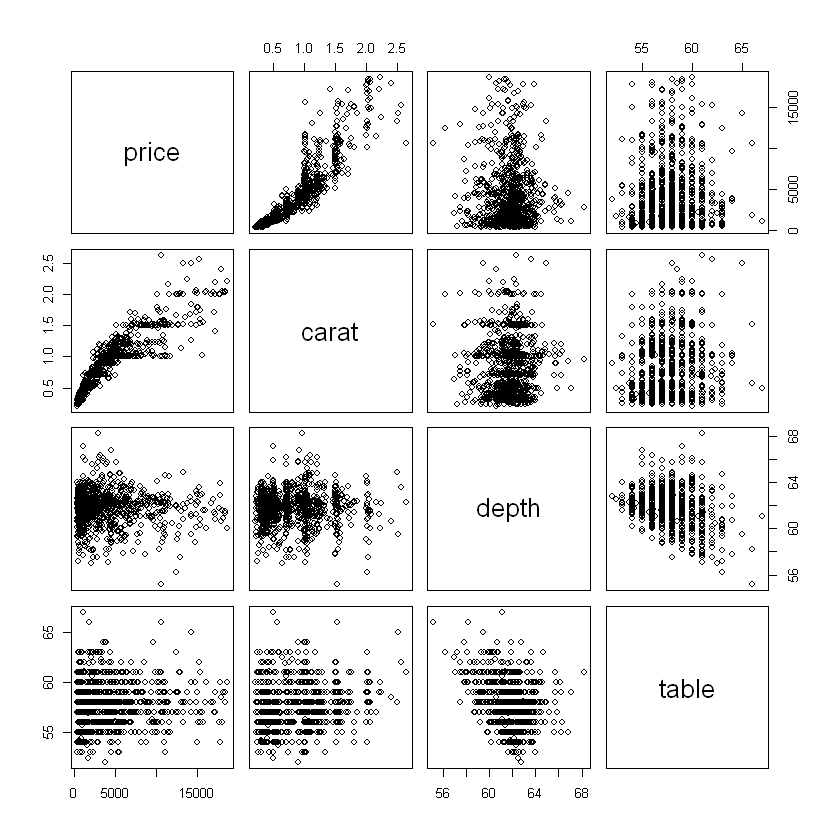

In [36]:
cor(mydia[,-5],method = 'pearson')
plot(mydia[,-5])

In [37]:
mydia[,-5]

price carat depth table
1     3564 1.04  66.1  60.0 
2     2238 0.64  62.0  55.0 
3      993 0.43  62.5  55.0 
4    10623 1.52  55.2  66.0 
5      473 0.30  63.5  59.0 
6     1168 0.40  61.9  55.0 
7      871 0.31  61.0  55.0 
8     3283 0.80  60.5  62.3 
9     3384 0.95  64.4  60.0 
10    3613 1.15  62.8  57.0 
11    3977 1.06  60.7  57.0 
12    2632 0.59  59.9  63.0 
13    2474 0.72  62.6  59.0 
14    4425 1.01  62.3  55.0 
15   15426 1.61  62.9  56.0 
16    6063 1.05  59.3  58.0 
17     522 0.35  62.4  55.0 
18     980 0.49  60.8  60.0 
19    1332 0.50  61.6  57.0 
20    5329 1.12  59.8  58.0 
21   11473 2.16  62.3  57.0 
22    1024 0.39  61.3  58.0 
23    1000 0.38  61.6  56.0 
24    3414 0.91  60.9  58.0 
25    2867 0.82  62.3  56.0 
26     608 0.24  62.4  54.0 
27    1585 0.53  61.4  55.0 
28     734 0.31  62.1  54.0 
29   12738 1.51  59.5  57.0 
30     592 0.29  60.8  63.0 
...  ...   ...   ...   ...  
971   5773 1.22  62.2  58   
972   1155 0.44  61.5  56   
973    558 0.32  61.3  55   
974   1653 0.56  62.5  59   
975   5911 1.16  62.0  56   
976   1995 0.70  63.6  55   
977   6499 1.01  62.7  58   
978   2607 0.72  62.7  59   
979    932 0.36  61.4  58   
980    525 0.25  62.1  56   
981   2056 0.70  58.1  60   
982    620 0.30  63.6  54   
983   2745 1.04  65.2  57   
984   5107 1.50  63.7  58   
985  11512 1.51  62.0  58   
986   2346 0.73  62.4  55   
987    552 0.24  63.1  56   
988  13278 2.50  64.9  58   
989   3835 1.00  62.0  61   
990   2141 0.71  61.8  56   
991   6738 1.02  63.3  58   
992   3838 1.02  62.8  64   
993    992 0.42  63.4  56   
994   1373 0.50  65.9  57   
995   3716 0.76  60.9  57   
996   1914 0.58  60.7  63   
997    427 0.33  62.2  54   
998   2034 0.50  61.1  58   
999  12717 1.53  61.8  59   
1000  3059 0.81  62.9  56

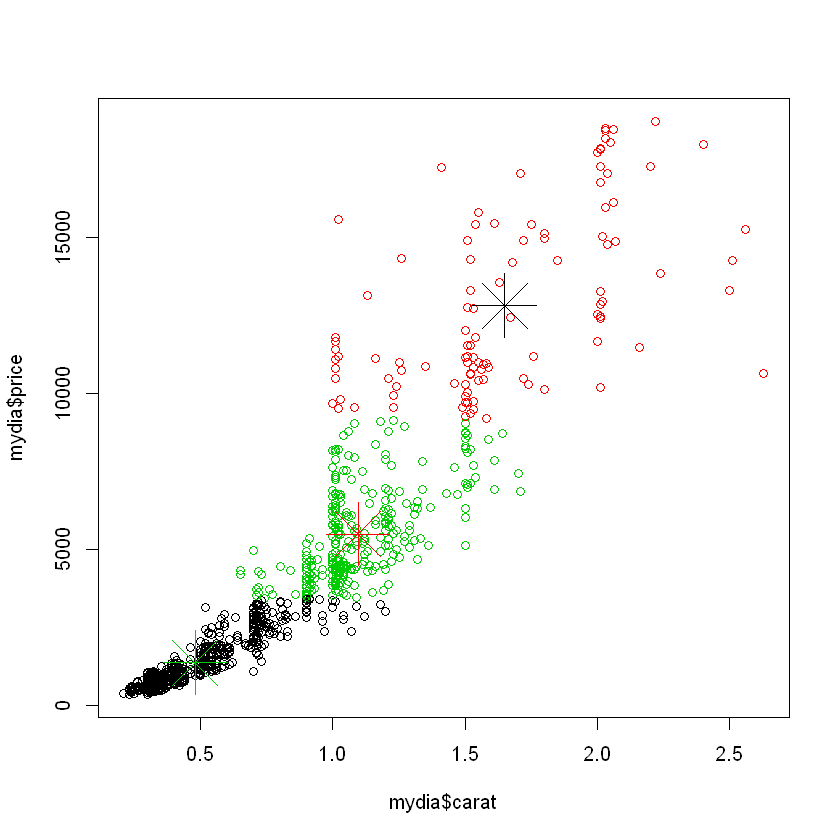

In [38]:
plot(mydia$carat,mydia$price,col=mydia$cluster)
points(result2$centers[,c('carat','price')],col=c(3,1,2),pch=8,cex=5)

In [39]:
if(!require(mclust)){
  install.packages('mclust')
  require(mclust)
}

Loading required package: mclust
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'mclust'"

package 'mclust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmp6ZCBGc\downloaded_packages


Loading required package: mclust
Package 'mclust' version 5.4.5
Type 'citation("mclust")' for citing this R package in publications.


In [40]:
model <- Mclust(USArrests)
summary(model,classification = TRUE)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEI (diagonal, equal shape) model with 3 components: 

 log-likelihood  n df       BIC      ICL
      -757.5594 50 20 -1593.359 -1597.95

Clustering table:
 1  2  3 
20 10 20 

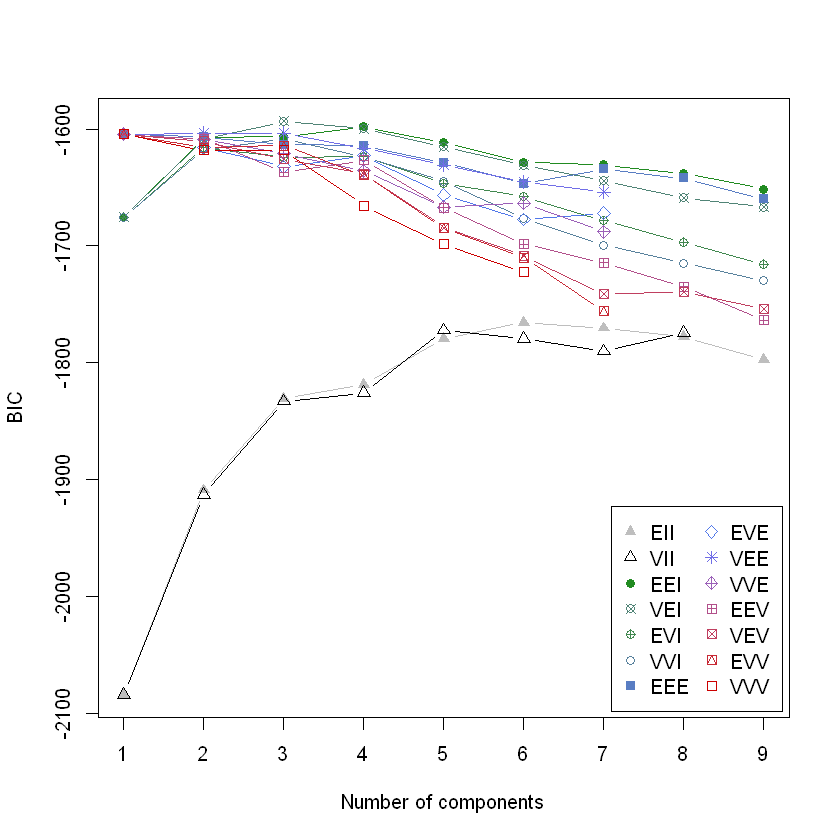

In [41]:
plot(model,what = 'BIC')

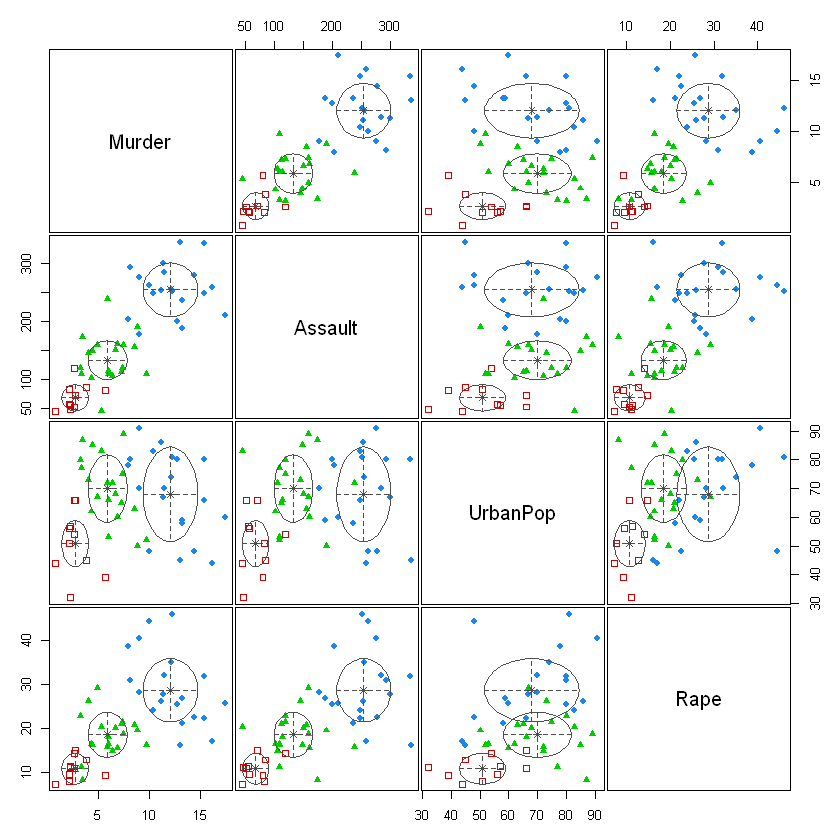

In [42]:
plot(model,what = 'classification')

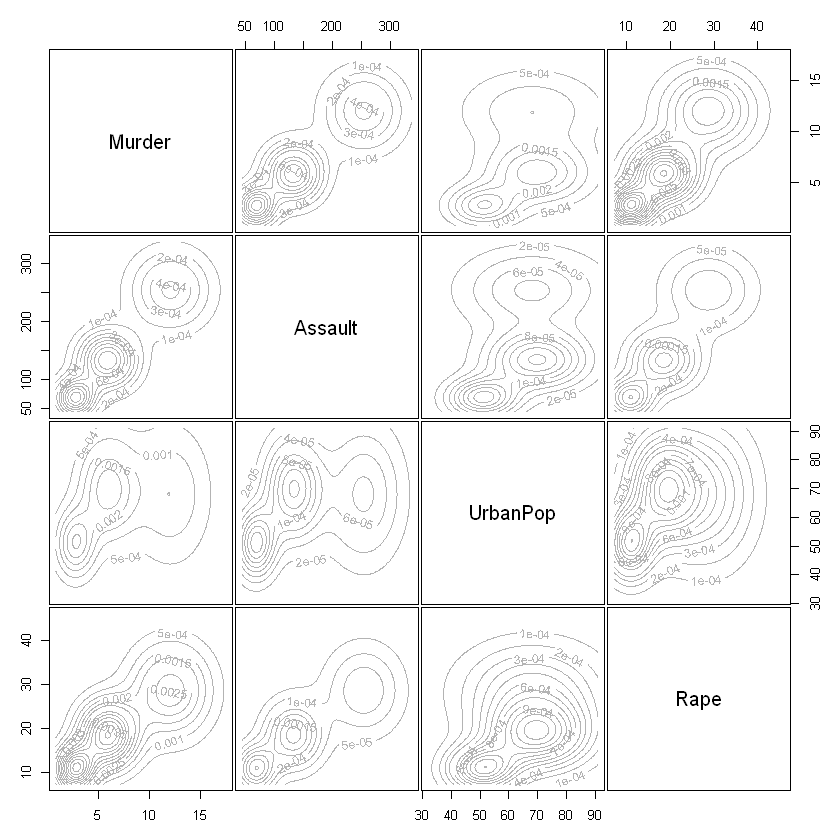

In [43]:
plot(model,what = 'density')